In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = load_iris()

In [3]:
dir(data)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
dfdata = data.data

dftargetnames = data.target_names

dftarget = data.target

dffeaturenames = data.feature_names

In [5]:
# dfdata.shape
dftargetnames

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
df = pd.DataFrame(data=dfdata , columns=dffeaturenames)

df['target'] = dftarget.reshape(150,1)

In [7]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


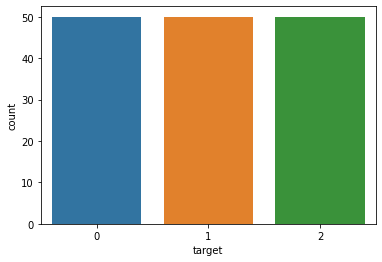

In [9]:
sns.countplot(df['target'])

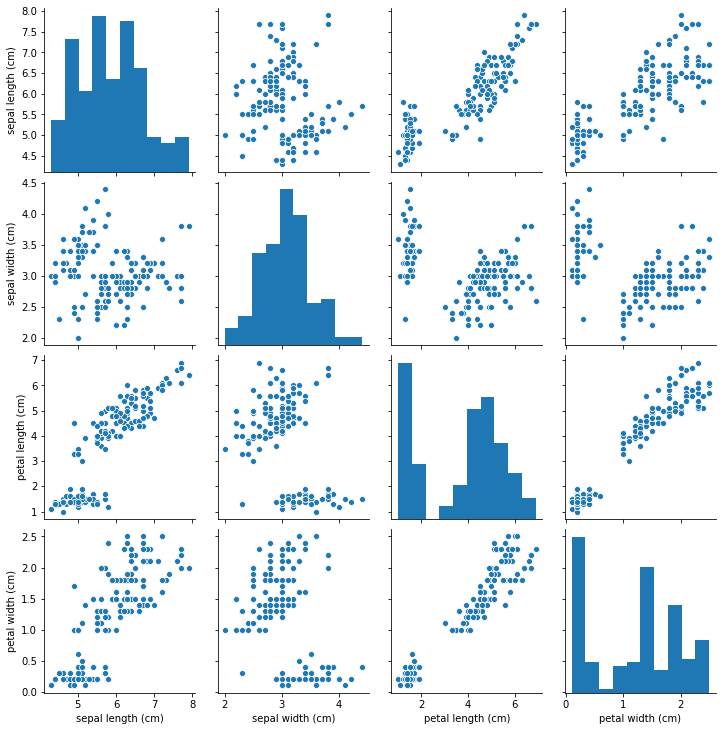

In [10]:
sns.pairplot(df.drop('target',axis=1))

In [20]:
# df1 = pd.get_dummies(df['target'] , drop_first=True)

In [21]:
# df[['1' , '2']] = df1

In [22]:
# df.drop('target' , axis=1, inplace=True)

In [25]:
df.drop(['1' , '2'] , axis = 1, inplace=True)

In [27]:
df['target'] = dftarget.reshape(150,1)

In [29]:
df.columns

X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']]

y = df['target']

In [39]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

In [40]:
logreg = LogisticRegression()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
logreg.fit(X_train , y_train)

LogisticRegression()

In [43]:
logreg.score(X_test , y_test)

1.0

In [45]:
y_predicted = logreg.predict(X_test)

In [46]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [47]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [52]:
testcase = X.iloc[:5, :]

In [56]:
correctanss = np.zeros((1,5))

In [57]:
logreg.predict(testcase)

array([0, 0, 0, 0, 0])